# Project: Investigate a Dataset - TMBD MOVIE DATA ANALYSIS

## Introduction

### Dataset Description
   This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, popularity, budget, vote count, vote average, cast, genres, director and revenue. In this report the data analysis will be use to answer these questions.
   
### Questions
   
1. **Which Year has the highest number of released movies**
2. **Directors with the highest Revenue**
3. **Genres with the overall average Revenue**
4. **Top 5 Highest movie revenue**
5. **Top 10 Actors with most apperance in Movies**
6. **What kinds of properties are associated with movies that have high revenues**
7. **How many movies are considered successful compare to unsuccessful movies**

### Packages to install
   In this project, `Numpy`, `Pandas`, `Matplotlib` and `Seaborn` will be required for analysis

In [1]:
# Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting graph sheet style
sns.set_style('darkgrid')

## Data Wrangling

Loading the `csv` file using `pandas.read_csv` function

In [2]:
# for better referrencing "df" will be use as variable name for the csv files
df = pd.read_csv('tmdb-movies.csv')

# for displaying all the columns in the dataframe
pd.set_option('display.max_columns', None) 

In [3]:
# checking our dataframe
df.head() # using the 'Head()' fuction to return the first 5 rows of the dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# For checking number of roles and columns in the dataframe
df.shape

(10866, 21)

There are 10,866 rows and 21 columns in the dataframe

To further view the column names, datatypes and presence of null values in the dataframe, the function `df.info` is used

In [5]:
# for showing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Before dealing with the missing values, there are some columns that are not required in our analysis, so they will be dropped.

columns to drop; `imdb_id`, `homepage`,`tagline`,`keywords`,`overview`, `budget_adj`, `revenue_adj`

In [6]:
# columns to drop
df.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)

In [7]:
# to view change
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [8]:
# changing the `release_date` column datatype to `datetime`
df['release_date'] = pd.to_datetime(df['release_date'])

# Confirming the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   director              10822 non-null  object        
 7   runtime               10866 non-null  int64         
 8   genres                10843 non-null  object        
 9   production_companies  9836 non-null   object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year    

## Data Cleaning


In [9]:
# Number of rows and columns
df.shape

(10866, 14)

In [10]:
# checking for the total sum of null values in each column
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Dropping the `Null` values in the three columns

In [11]:
# Dropping all null values
df.dropna(inplace=True)

# reseting the index
df.reset_index(drop=True, inplace=True)

# to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9773 non-null   int64         
 1   popularity            9773 non-null   float64       
 2   budget                9773 non-null   int64         
 3   revenue               9773 non-null   int64         
 4   original_title        9773 non-null   object        
 5   cast                  9773 non-null   object        
 6   director              9773 non-null   object        
 7   runtime               9773 non-null   int64         
 8   genres                9773 non-null   object        
 9   production_companies  9773 non-null   object        
 10  release_date          9773 non-null   datetime64[ns]
 11  vote_count            9773 non-null   int64         
 12  vote_average          9773 non-null   float64       
 13  release_year      

checking for sum of `Duplicated` rows in the dataframe

In [12]:
df.duplicated().sum()

1

There is one duplicated row in the dataset, so this row will be dropped.

In [13]:
# Drop the duplicated row and check if there are no duplicated rows after cleaning
df.drop_duplicates(inplace=True)

# To confirm change
df.duplicated().sum()

0

Checking the summary statistics of the dataframe to see if there are other anomalies.

In [14]:
# To show the summary statistics of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


From the statistics above, we can see that the minimum `budget`, `revenue`, and `runtime` is 0. This is not reasonable in the real time scenario. So we need to clean these invalid data.

First we need to check how many `zero` value are in each of the three columns

In [15]:
# Sum of Zero value in the three columns
df[['budget', 'revenue', 'runtime']].apply(lambda x:x==0).sum()

budget     4751
revenue    5022
runtime      13
dtype: int64

In [16]:
# clean the invalid row index
zero_value_index = df.query('budget == 0 | revenue == 0 | runtime == 0').index

# dropping the index
df.drop(zero_value_index, axis=0, inplace=True)

# confirming the change
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


Dropping zero value presence in all of the three columns has greatly reduced out dataset from 9,772 to 3,805

## Exploratory Data Analysis

### Research Question 1 (Which year has the highest release of Movie)

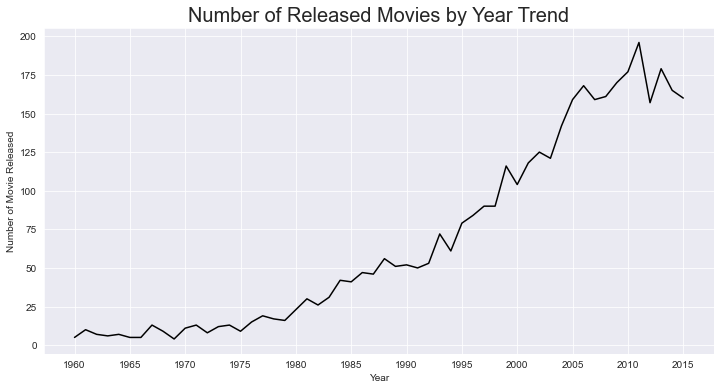

In [17]:
release_year_movie = df.groupby('release_year')['id'].count() # counting the number of each year movie release by a unique column
plt.figure(figsize=(12,6))
plt.plot(release_year_movie, color='black')
plt.xticks(np.arange(1960,2020,5)) # setting the year label to five years interval
plt.xlabel('Year')
plt.ylabel('Number of Movie Released')
plt.title('Number of Released Movies by Year Trend', fontdict={'fontsize':20});

In [18]:
# using groupby to display the top 3 years with most movie release
df.groupby('release_year')['id'].count().sort_values(ascending=False).head(3)

release_year
2011    196
2013    179
2010    177
Name: id, dtype: int64

From the above plot and output we can see that the year `2011` has the highest number of released movies (196) followed by 2013 and then 2010

### Research Question 2 (Directors with the highest revenue)

As some of the columns contains delimeter(|) as a seperator between different `director` and `genres`.

Below is a funtion that split the row that contains `|` and append it to the rows of the dataset

In [19]:
def split_cols(df:pd.DataFrame, col: str, delimeter:str):
    df[col] = df[col].str.split(delimeter)
     # explode() method of Pandas to convert a column with list-type values to multiple rows
    return df.explode(col)

In [20]:
df_director = df[['id', 'revenue', 'director']].copy() # selecting only columns that is needed and making a copy of it
df_director = split_cols(df_director, 'director', "|") # from the split funtion above

# to view the splitted dataframe
df_director.head()

,id,revenue,director
0,135397,1513528810,Colin Trevorrow
1,76341,378436354,George Miller
2,262500,295238201,Robert Schwentke
3,140607,2068178225,J.J. Abrams
4,168259,1506249360,James Wan


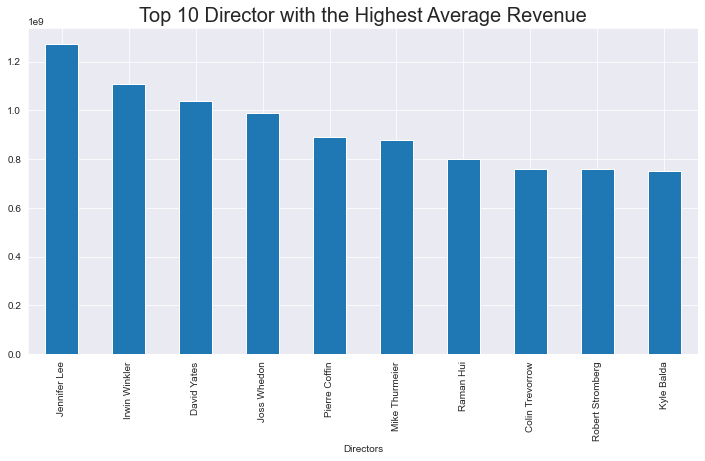

In [21]:
# plotting the director that made most highest avg revenue
plt.figure(figsize=(12,6))
df_director.groupby('director')['revenue'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Director with the Highest Average Revenue', fontdict={'fontsize':20})
plt.xlabel('Directors');

### Research Question 3 ( Genres with the Overall Average Revenue)

In [22]:
# splitting the genres columns and appending to the rows
df_genres = df.copy()
df_genres = split_cols(df_genres, 'genres', '|')

# to confirm change
df_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


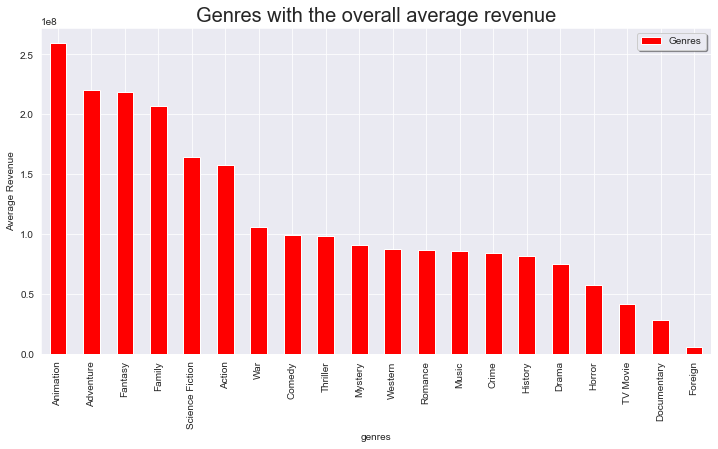

In [23]:
# plotting which genres made most of the revenue
plt.figure(figsize=(12,6))
df_genres.groupby('genres')['revenue'].mean().sort_values(ascending=False).plot(kind='bar', color='Red', label='Genres')
plt.title('Genres with the overall average revenue', fontdict={'fontsize':20})
plt.ylabel('Average Revenue')
plt.legend(shadow=True);

### Research Question 4 ( Top 5 Highest Movie  Revenue )

Plotting the unique movie title rows to show top 5 movie title with the highest average revenue made

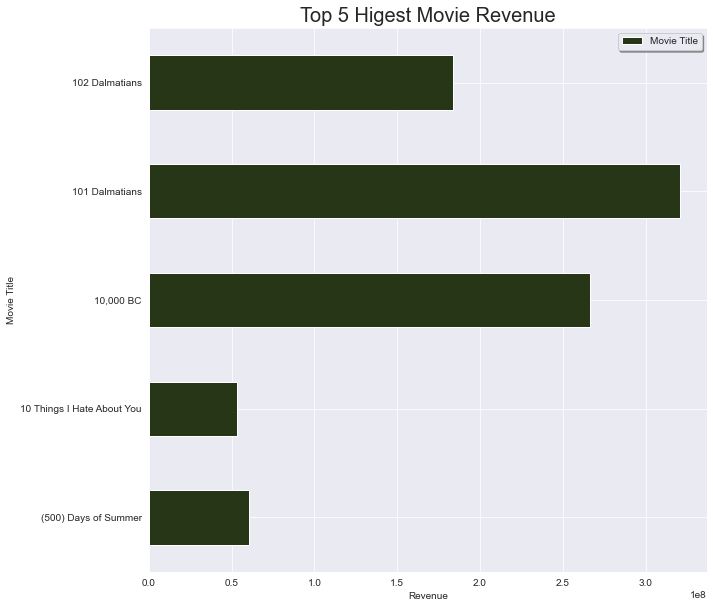

In [24]:
df_title = df.copy()
plt.figure(figsize=(10,10))
df_title.groupby('original_title')['revenue'].mean()[:5].plot(kind='barh', color='#283618', label='Movie Title')
plt.title('Top 5 Higest Movie Revenue', fontdict={'fontsize':20})
plt.ylabel('Movie Title')
plt.xlabel('Revenue')
plt.legend(shadow=True);

### Research Question 5 ( Highest Number of Apperance in Movies by Cast)

In [25]:
# making a copy of the dataframe with only two selected columns
df_cast = df[['id','cast']] 

Since there are more than one cast in movie which is totally normall, i'll split the cast column and append by rows to get the Actor that appear in most Films

In [27]:
# splitting using the funtion split_cols
df_cast = split_cols(df_cast, 'cast', '|')

In [28]:
# to confirm change
df_cast.head()

,id,cast
0,135397,Chris Pratt
0,135397,Bryce Dallas Howard
0,135397,Irrfan Khan
0,135397,Vincent D'Onofrio
0,135397,Nick Robinson


In [29]:
# reseting the index to create a unique column for value count
df_cast.reset_index(inplace=True, drop=True)

df_cast.head()

,id,cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [30]:
# changing the 'id' column to a unique numbering
df_cast['id'] = np.arange(len(df_cast))
df_cast.head()

,id,cast
0,0,Chris Pratt
1,1,Bryce Dallas Howard
2,2,Irrfan Khan
3,3,Vincent D'Onofrio
4,4,Nick Robinson


Plotting by the number of apperance top movie actors appeared in

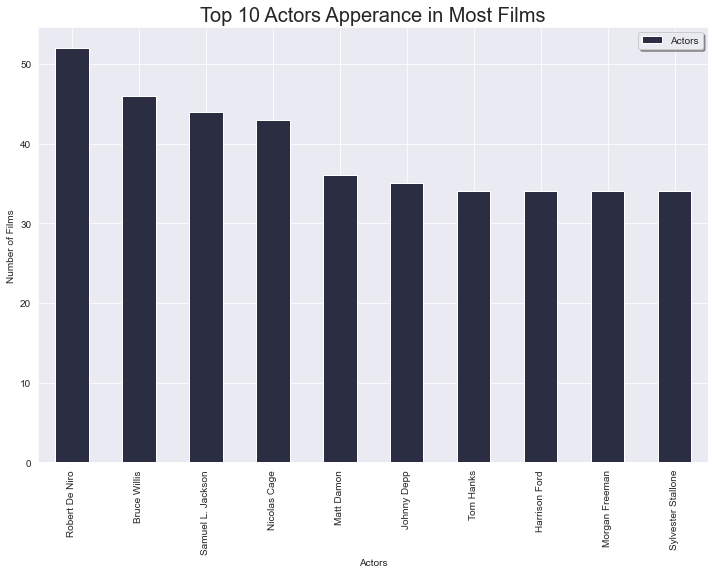

In [31]:
plt.figure(figsize=(12,8))
df_cast.groupby('cast').count()['id'].sort_values(ascending=False)[:10].plot(kind='bar', color='#2b2d42', label='Actors')
plt.title('Top 10 Actors Apperance in Most Films', fontdict={'fontsize':20})
plt.ylabel('Number of Films')
plt.xlabel('Actors')
plt.legend(shadow=True);

### Research Question 6 ( What kinds of properties are associated with movies that have high revenues)

To answer this question, we need to discover what high revenue is considering `revenue` is a dependent variable.

In [32]:
# Summary statistics of revenue

df.revenue.describe()

count    3.805000e+03
mean     1.089734e+08
std      1.772976e+08
min      2.000000e+00
25%      1.433379e+07
50%      4.621664e+07
75%      1.260695e+08
max      2.781506e+09
Name: revenue, dtype: float64

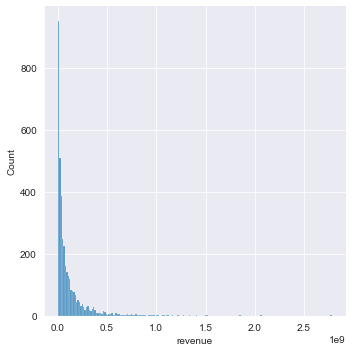

In [33]:
# checking the univariate distribution of revenue
sns.displot(df.revenue);

We need to look at the reveneu trend over the years

*Bivariate Analysis*

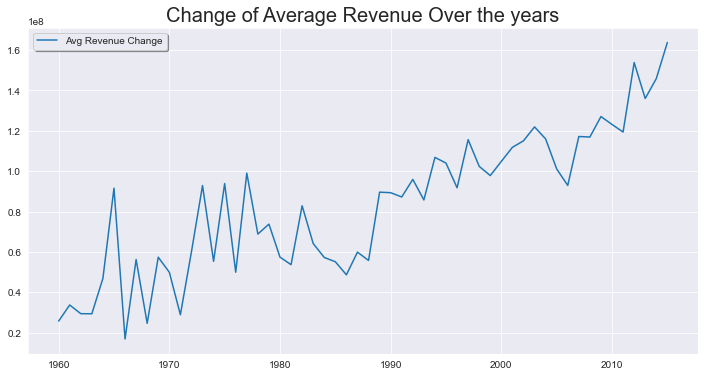

In [34]:
# using line plot to check how avg revenue has increased over years
revenue_trend = df.groupby('release_year')['revenue'].mean()
plt.figure(figsize=(12,6))
plt.plot(revenue_trend, label='Avg Revenue Change')
plt.title('Change of Average Revenue Over the years', fontdict={'fontsize':20})
plt.legend(shadow=True);

The line chart above shows how the `revenue` has changed, it changed the most in the 1900s

Next, we need to determine high revenue which can be considered as above `.75` quantile value

In [35]:
high_rev = df.revenue.quantile(q=0.75)
high_rev_df = df[df.revenue > high_rev]

#checking for the summary statistics of the high revenue dataframe
high_rev_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,951.000000,951.000000,9.510000e+02,9.510000e+02,951.000000,951.000000,951.000000,951.000000
mean,37353.886435,2.330936,7.959221e+07,3.224217e+08,116.256572,1357.668770,6.401788,2003.712934
std,62988.541636,2.330797,5.586977e+07,2.479904e+08,21.499018,1331.460248,0.703799,9.101106
min,11.000000,0.131526,1.500000e+04,1.262169e+08,72.000000,14.000000,4.200000,1961.000000
25%,1595.000000,1.143291,3.800000e+07,1.690838e+08,100.000000,470.000000,5.900000,1998.000000
50%,9506.000000,1.730679,7.000000e+07,2.348019e+08,114.000000,879.000000,6.400000,2006.000000
75%,45440.500000,2.691687,1.100000e+08,3.688734e+08,130.000000,1774.000000,6.900000,2011.000000
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000


since we've gotten our high revenue dataframe, we will basically check the relationship/correlation between different features like `popularity`,`budget` and `vote_count` as independent variable against `revenue` as dependent variable.

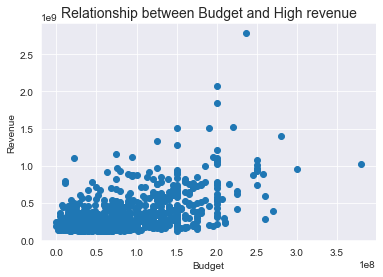

In [36]:
# Finding how budget associate with high revenue using scatterplot
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('Relationship between Budget and High revenue', fontdict={'fontsize':14})
plt.xlabel('Budget')
plt.ylabel('Revenue');

In [37]:
high_rev_df[['budget', 'revenue']].corr() # this describe the strength of relationship between two variable

,budget,revenue
budget,1.000000,0.554461
revenue,0.554461,1.000000


From the correlation between those two variables, 0.55 is considered moderately correlated, therefore we could say there exist a positive correlation between them and that is the two variable tend to move in the same direction

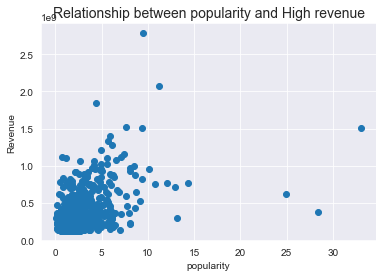

In [38]:
# Finding how popularity associate with high revenue using scatterplot
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('Relationship between popularity and High revenue', fontdict={'fontsize':14})
plt.xlabel('popularity')
plt.ylabel('Revenue');

In [39]:
# finding the correlation coefficient
high_rev_df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.512492
revenue,0.512492,1.000000


Relationship between those two from the coefficient and scatterplot is considered moderately correlated

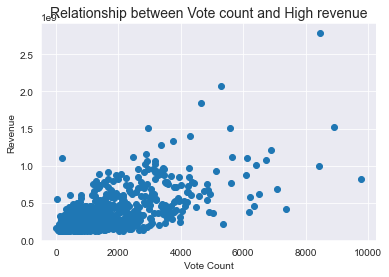

In [40]:
# # Finding how vote_count associate with high revenue using scatterplot
plt.scatter(x=high_rev_df.vote_count, y=high_rev_df.revenue)
plt.title('Relationship between Vote count and High revenue', fontdict={'fontsize':14})
plt.xlabel('Vote Count')
plt.ylabel('Revenue');

In [41]:
# finding the correlation coefficient
high_rev_df[['vote_count', 'revenue']].corr()

,vote_count,revenue
vote_count,1.00000,0.67573
revenue,0.67573,1.00000


This is considered strong relationship between the two variable. So as `vote count` increases `revenue` increases

### Research Question 7 (How many number of movies that were successful and unsuccessful)

From findings, it is said that for a movie to be successful, it has to have revenue of atleast x2 of it budgets. To do this, we will need to create a new column in the dataframe and set to `Yes` if successful, else `No` for unsuccessful

In [42]:
df_s = df.copy()
#creating an empty list
success = []

for budget,revenue in zip(df_s.budget, df_s.revenue):
    if budget*2 > revenue: success.append('Yes') # append the conditions to the list
    else: success.append('No')

In [43]:
"""creating a new column in the dataframe
    and setting it to equals to the appended list
"""
df_s['successful'] = success

df_s.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,successful
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,No


  successful    id
0         No  2013
1        Yes  1792


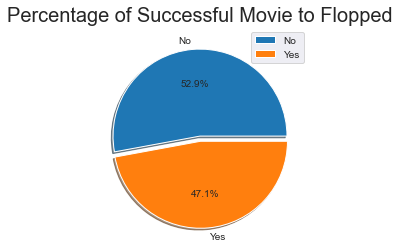

In [45]:
successful = df_s[['id', 'successful']].groupby('successful', as_index=False).count()

# showing the number of successful and non successful table
print(successful)

sizes = successful.id
label = successful.successful
plt.pie(sizes, labels=label, explode=[0,0.06], shadow=True, autopct='%1.1f%%')
plt.title('Percentage of Successful Movie to Flopped', fontsize=20)
plt.legend(labels=label);

From the above pie chart, the number of successful movies is 1,792 and unsuccessful movies is 2013, which is about 47.1% and 52.9% respectively. 

## Conclusions

1. From the research question posed and the analysis carried out, we could see that the year 2011 has the highest number of movie released followed by 2013 and 2010

2. Top 5 directors with the highest average revenue of all time are
* Jennifer Lee
* Irwin Winkler
* David Yates
* Joss Whedon
* Pierre Coffin
* Mike Thurmeier
* Raman Hui
* Colin Trevorrow
* Robert Stromberg

3. Genres with overall average revenue were animation, adventure, fantasy etc.

4. Top 5 highest movie revenue were 102 Dalmatians, 101 Dalmatians, 10,000 BC, 10 things i hate about you and (500) days of summer.

5. Top 5 Actors with the most appearance were Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Matt Damon

6. After selecting the dataframe of revenue that is considered high(75% Quantile), the test of correlation (a statistical of the relationship between two variable) between revenue as the dependent variable and other columns as independent were all found to be moderately to strong correlation between that is relationship between them is strong, so therefore as independent variable increases the dependent variable (revenue) increases. This tells us those columns are the characteristic of movies with high revenue.

7. They were more unsuccessful movie (52.9%) compare to successful movies (47.1%).


### Limitation
The limitation of the analysis report is that they were so many zero value in the `Budget`, and `Revenue` which were 4751 and 5022 respectively, although the `runtime` column contained just about 13 zero values. Dropping the zero value in either of the three columns drastically reduced the number of row from 9,772 to 3,805 which is about 62% of number of the dataset dropped. This might have caused a huge change in the result of the analysis and findings.


## References

1. https://stackoverflow.com/questions/2489669/how-do-python-functions-handle-the-types-of-parameters-that-you-pass-in
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
3. https://thats-it-code.com/pandas/how-to-convert-multivalue-column-to-multiple-rows/
4. https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/